In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/prakh/Downloads/ECOMM DATA.xlsx")

In [3]:
print("Initial Data Sample")
print(df.head())

Initial Data Sample
   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Tec

In [4]:
print("Missing values per column")
print(df.isnull().sum())

Missing values per column
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [5]:
df.dropna(inplace=True)

In [6]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [7]:
print("Number of duplicate rows", df.duplicated().sum())

Number of duplicate rows 0


In [8]:
print("Data Types of columns",df.dtypes)

Data Types of columns Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


In [9]:
print("Summary Statistics for numeric columns",df.describe())

Summary Statistics for numeric columns              Row ID                     Order Date  \
count   9994.000000                           9994   
mean   36293.500000  2013-04-30 19:20:02.401440768   
min    31297.000000            2011-01-04 00:00:00   
25%    33795.250000            2012-05-23 00:00:00   
50%    36293.500000            2013-06-27 00:00:00   
75%    38791.750000            2014-05-15 00:00:00   
max    41290.000000            2014-12-31 00:00:00   
std     2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2013-05-04 18:20:49.229537792  55190.379428    229.858001     3.789574   
min              2011-01-08 00:00:00   1040.000000      0.444000     1.000000   
25%              2012-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2013-06-30 00:00:00  56430.500000     54.490000     

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
total_sales = df['Sales'].sum()

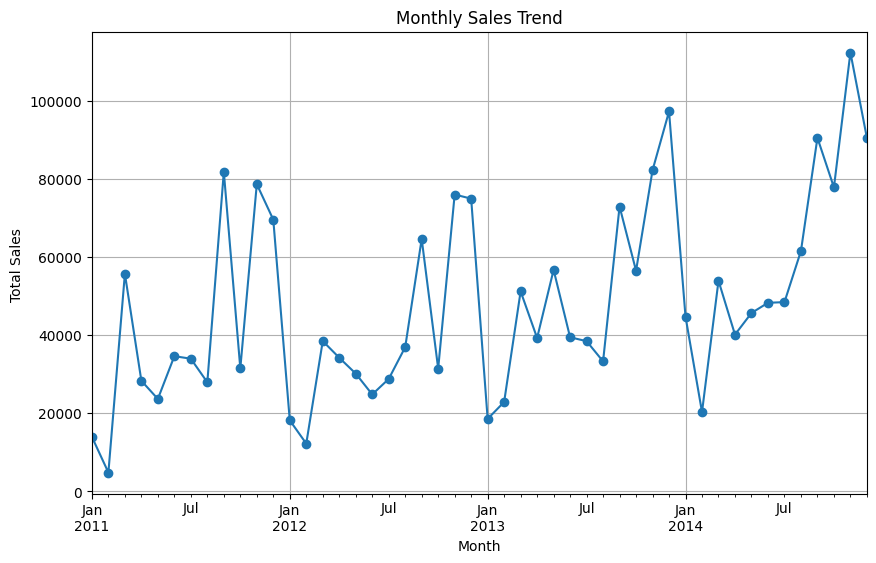

In [12]:
df['Order Month']= df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(kind ='line',marker='o',figsize=(10,6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ')
plt.grid(True)
plt.show()

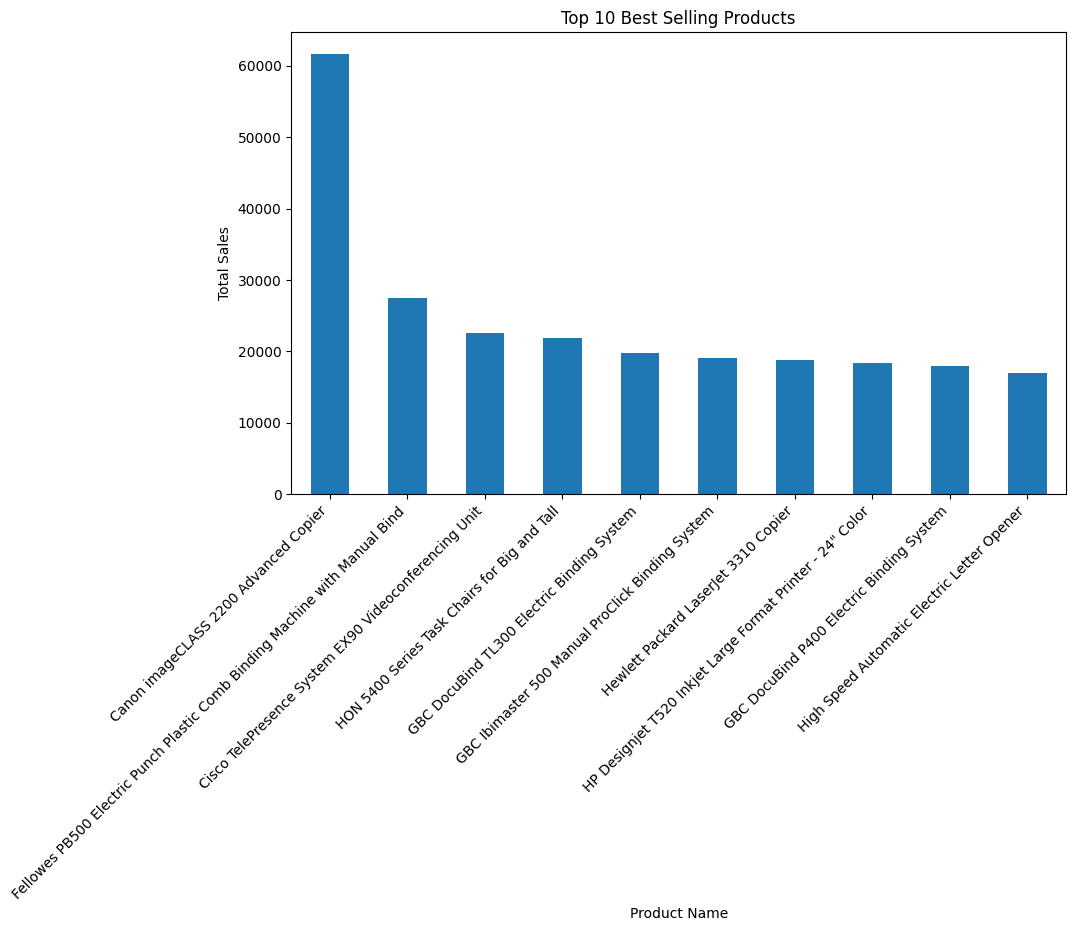

In [13]:
best_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
best_selling_products.plot(kind ='bar',figsize=(10,6))
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation =45,ha='right')
plt.show()

In [14]:
average_discount = df['Discount'].mean()
average_profit = df['Profit'].mean()
total_orders = df['Order ID'].nunique()
unique_customers = df['Customer ID'].nunique()
most_common_segment = df['Segment'].mode()[0]
most_common_category = df['Category'].mode()[0]
most_common_region = df['Region'].mode()[0]
profit_by_category = df.groupby('Category')['Profit'].sum()
revenue_by_segment =df.groupby('Segment')['Sales'].sum()

In [15]:
print("Total Sales",total_sales)
print("Average Discount",average_discount)
print("Average Profit",average_profit)
print("Total Orders",total_orders)
print("Unique Customer",unique_customers)
print("Most common Segment",most_common_segment)
print("Most Common Category",most_common_category)
print("Most Common Region", most_common_region)
print("Profit by Category",profit_by_category)
print("Revenue by Segment",revenue_by_segment)

Total Sales 2297200.8603
Average Discount 0.1562027216329798
Average Profit 28.65689630778467
Total Orders 5009
Unique Customer 793
Most common Segment Consumer
Most Common Category Office Supplies
Most Common Region West
Profit by Category Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64
Revenue by Segment Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64


In [16]:
df["Ship Time"]=(df['Ship Date']-df['Order Date']).dt.days
average_ship_time = df['Ship Time'].mean()

In [17]:
monthly_sales_distribution= df.groupby(df['Order Date'].dt.month)['Sales'].sum()

In [18]:
revenue_per_customer = df.groupby("Customer ID")['Sales'].sum()

In [19]:
sales_by_region = df.groupby("Region")['Sales'].sum()

In [20]:
sales_with_discount = df[df['Discount']>0]['Sales'].sum()
sales_without_discount = df[df['Discount']==0]['Sales'].sum()
discount_effectiveness = (sales_with_discount - sales_without_discount)/sales_without_discount*100

Text(0, 0.5, 'Total Profit')

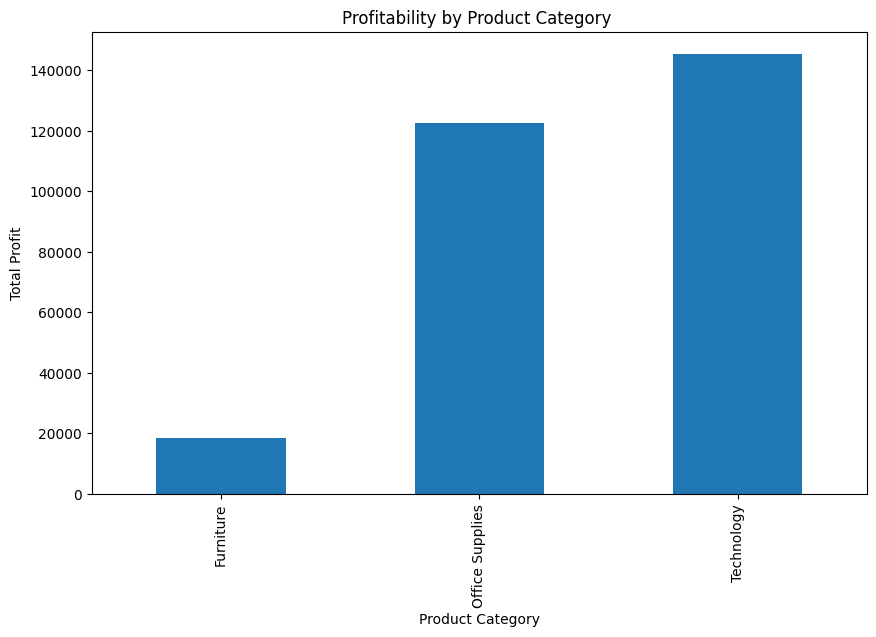

In [21]:
profit_by_category.plot(kind ='bar',figsize=(10,6))
plt.title("Profitability by Product Category ")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")

Text(0, 0.5, 'Total Revenue')

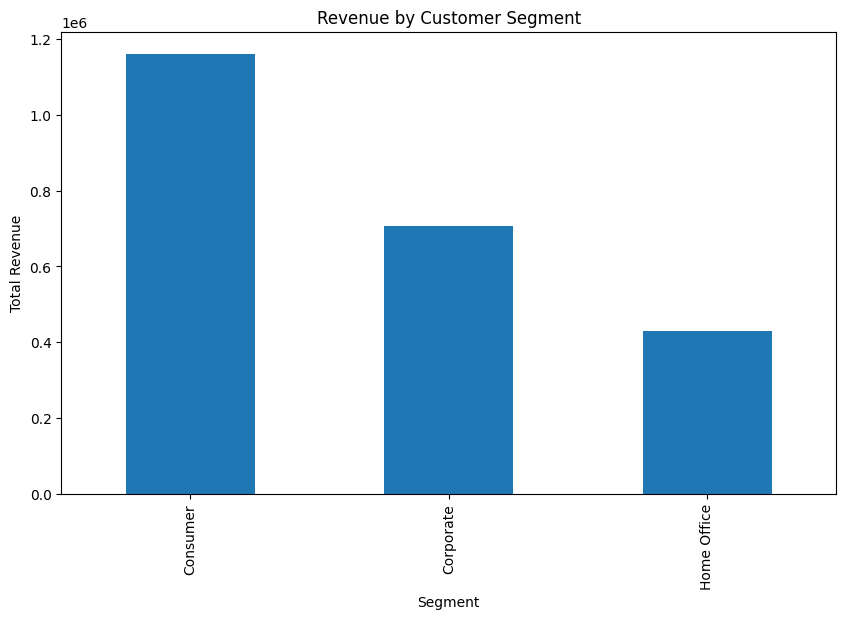

In [22]:
revenue_by_segment.plot(kind ='bar',figsize=(10,6))
plt.title("Revenue by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Revenue")